# Import and init

In [29]:
import os
from timeit import default_timer as timer

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
line1 = 'This is one line of the output file.'
line2 = 12345
line3 = '2025-01-05'

In [31]:
OUTPUT_HEADERS = 'metric,file_type,rows,value\n'
METRICS_SAVE_TO_FILE_LATENCY = ''
METRICS_READ_FILE_LATENCY = ''
METRICS_FILE_SIZE = ''

# Experiment

## Save to excel and csv

In [32]:
rows_range = [10**i for i in range(6)] + [100000*i for i in range(2, 11)]
rows_range

[1,
 10,
 100,
 1000,
 10000,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 1000000]

In [33]:
# for i in tqdm([10**i for i in range(7)]):
for i in tqdm(rows_range):
    df_dup = pd.DataFrame({
        'column1': [line1] * i,
        'column2': [line2] * i,
        'column3': [line3] * i
    })
    # print(len(df_dup))
    # CSV
    output_csv = f'output/csv_{i}.csv'
    # Save latency
    start = timer()
    df_dup.to_csv(output_csv, index = False)
    stop = timer()
    METRICS_SAVE_TO_FILE_LATENCY += f'save_latency,csv,{i},{stop-start}\n'
    # Read latency
    start = timer()
    df_read = pd.read_csv(output_csv)
    stop = timer()
    METRICS_READ_FILE_LATENCY += f'read_latency,csv,{i},{stop-start}\n'
    # File size
    METRICS_FILE_SIZE += f'file_size,csv,{i},{os.path.getsize(output_csv)}\n'
    
    # EXCEL
    output_excel = f'output/excel_{i}.xlsx'
    # Save latency
    start = timer()
    df_dup.to_excel(output_excel, index = False)
    stop = timer()
    METRICS_SAVE_TO_FILE_LATENCY += f'save_latency,excel,{i},{stop-start}\n'
    # Read latency
    start = timer()
    df_read = pd.read_excel(output_excel)
    stop = timer()
    METRICS_READ_FILE_LATENCY += f'read_latency,excel,{i},{stop-start}\n'
    # File size
    METRICS_FILE_SIZE += f'file_size,excel,{i},{os.path.getsize(output_excel)}\n'


100%|██████████| 15/15 [03:38<00:00, 14.54s/it]


## Save metrics to output

In [34]:
with open('csv_vs_excel_results.csv', 'w') as f:
    for i in (
        OUTPUT_HEADERS,
        METRICS_SAVE_TO_FILE_LATENCY,
        METRICS_READ_FILE_LATENCY,
        METRICS_FILE_SIZE
    ):
        f.write(i)


# Visualise results

In [35]:
df_results = pd.read_csv('csv_vs_excel_results.csv')
df_results

,metric,file_type,rows,value
0,save_latency,csv,1,3.771700e-03
1,save_latency,excel,1,6.907420e-02
2,save_latency,csv,10,2.913600e-03
3,save_latency,excel,10,3.817130e-02
4,save_latency,csv,100,2.524000e-03
...,...,...,...,...
85,file_size,excel,800000,9.029446e+06
86,file_size,csv,900000,4.950002e+07
87,file_size,excel,900000,1.015773e+07
88,file_size,csv,1000000,5.500002e+07


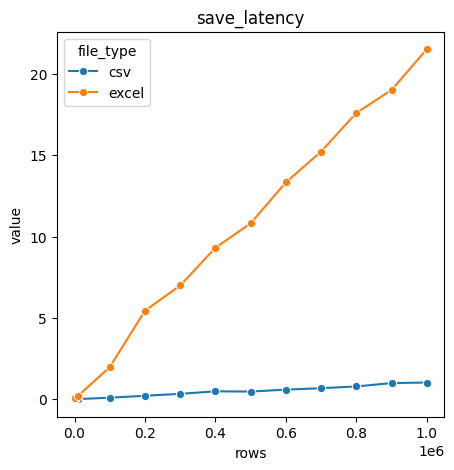

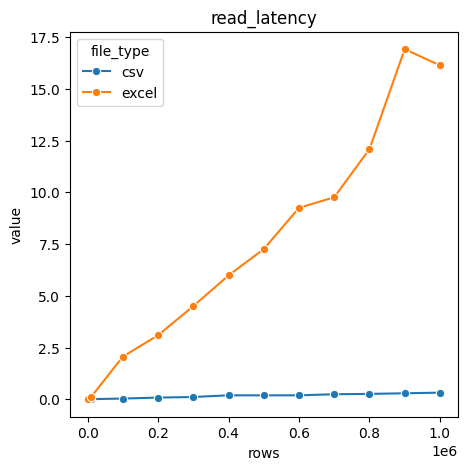

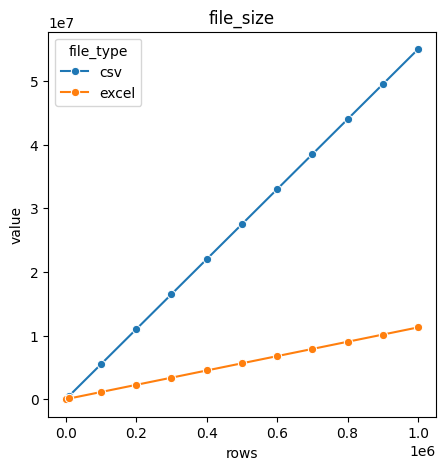

In [ ]:
for metric_type in df_results['metric'].unique().tolist():
    df_slice = df_results[df_results['metric'] == metric_type]
    plt.figure(figsize = (5, 5))
    sns.lineplot(
        x = 'rows',
        y = 'value',
        hue = 'file_type',
        data = df_slice,
        marker = 'o'
    )
    plt.title(metric_type)
    # plt.ylabel('value (seconds)')